## 数据提取
### 导入库

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import sklearn.tree as tree
import graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### 数据表读取及预览

In [2]:
autoinsurance_df = pd.read_csv('./车险数据/car_insurance_claim.csv')
autoinsurance_df.drop("ID",axis=1,inplace=True)
autoinsurance_df.drop("BIRTH",axis=1,inplace=True)
autoinsurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    10302 non-null  int64  
 1   AGE         10302 non-null  int64  
 2   HOMEKIDS    10302 non-null  int64  
 3   YOJ         9754 non-null   float64
 4   INCOME      9732 non-null   float64
 5   PARENT      10302 non-null  object 
 6   HOME_VAL    9727 non-null   float64
 7   MSTATUS     10302 non-null  object 
 8   GENDER      10302 non-null  object 
 9   EDUCATION   10302 non-null  object 
 10  OCCUPATION  9637 non-null   object 
 11  TRAVTIME    10302 non-null  int64  
 12  CAR_USE     10302 non-null  object 
 13  BLUEBOOK    10302 non-null  int64  
 14  TIF         10302 non-null  int64  
 15  CAR_TYPE    10302 non-null  object 
 16  RED_CAR     10302 non-null  object 
 17  OLDCLAIM    10302 non-null  int64  
 18  CLM_FREQ    10302 non-null  int64  
 19  REVOKED     10302 non-nul

### 字段介绍  
 
特征名称|定义                   
----------|------------------
KIDSDRIV|青少年年驾驶者数量
AGE|驾驶员的年龄|
HOMEKIDS|家庭小孩的数量|
YOJ|工作年限|
INCOM|收入
PARENT|是否为人父母
HOME_VAL|房屋价值
MSTAUS|婚姻状况
GENDER|性别
EDUCATION|驾驶证受教育程度
OCCUPATION|驾驶者的职业
TRAVTIME|驾车行驶距离
CAR_USE|盈利还是非盈利车辆
BKLUBOOK|购车价格
TIF|参保时长
CAR_TYPE|车辆种类
RED_CAR|车身颜色是否为红色
OLDCLAIM|过去5年的总赔付额
CLM_FREQ|过去5年的总索赔次数
REVOKED|是否在过去7年内获得的驾照
MVR_PIS|交通违法记录
CAR_AGE|车龄
URBANICITY|所在城市建设情况  

目标名称|定义
---|-----
CLAIM_FLAG|预测车辆是否会发生意外
CLM_AMT|车辆发生意外时需要赔付的金额


### 数据完整性检查
查看各字段数据的缺失情况

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


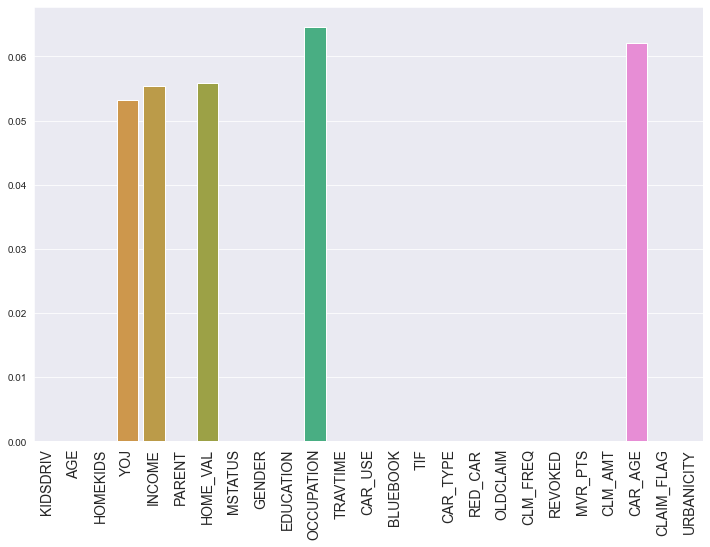

In [3]:
null_data = autoinsurance_df.isnull().sum()
x_raw = autoinsurance_df.columns
null_rate = null_data.values / len(autoinsurance_df)
plt.figure(figsize=(12,8))
sns.barplot(x_raw, null_rate)
plt.xticks(rotation=90,fontsize=14)
plt.show()

### 数据清洗
去除字段信息存在缺失的样本

In [4]:
autoinsurance_df = autoinsurance_df[autoinsurance_df["AGE"].notnull() & 
                autoinsurance_df["YOJ"].notnull() & 
                autoinsurance_df["INCOME"].notnull() &
                autoinsurance_df["HOME_VAL"].notnull() &
                autoinsurance_df["OCCUPATION"].notnull() &
                autoinsurance_df["CAR_AGE"].notnull()]

In [5]:
autoinsurance_df

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60,0,11.0,67349.0,No,0.0,z_No,M,PhD,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,0,43,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,0,48,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,0,35,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
6,0,34,1,12.0,125301.0,Yes,0.0,z_No,z_F,Bachelors,...,Sports Car,no,0,0,No,0,2946,7.0,1,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,35,0,11.0,43112.0,No,0.0,z_No,M,z_High School,...,Panel Truck,yes,0,0,No,0,0,8.0,0,z_Highly Rural/ Rural
10297,1,45,2,9.0,164669.0,No,386273.0,Yes,M,PhD,...,Minivan,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban
10299,0,48,0,15.0,39837.0,No,170611.0,Yes,z_F,<High School,...,z_SUV,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10300,0,50,0,7.0,43445.0,No,149248.0,Yes,z_F,Bachelors,...,Minivan,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban


### 查看数据分布情况
查看各字段数据分布阶段

In [6]:
object_features = autoinsurance_df.select_dtypes('object').columns
int64_features = autoinsurance_df.select_dtypes('int64').columns
float64_features = autoinsurance_df.select_dtypes('float64').columns

In [7]:
int64_features = int64_features.drop(["CLM_AMT","CLAIM_FLAG"])

array([[<AxesSubplot:title={'center':'KIDSDRIV'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'HOMEKIDS'}>],
       [<AxesSubplot:title={'center':'TRAVTIME'}>,
        <AxesSubplot:title={'center':'BLUEBOOK'}>,
        <AxesSubplot:title={'center':'TIF'}>],
       [<AxesSubplot:title={'center':'OLDCLAIM'}>,
        <AxesSubplot:title={'center':'CLM_FREQ'}>,
        <AxesSubplot:title={'center':'MVR_PTS'}>]], dtype=object)

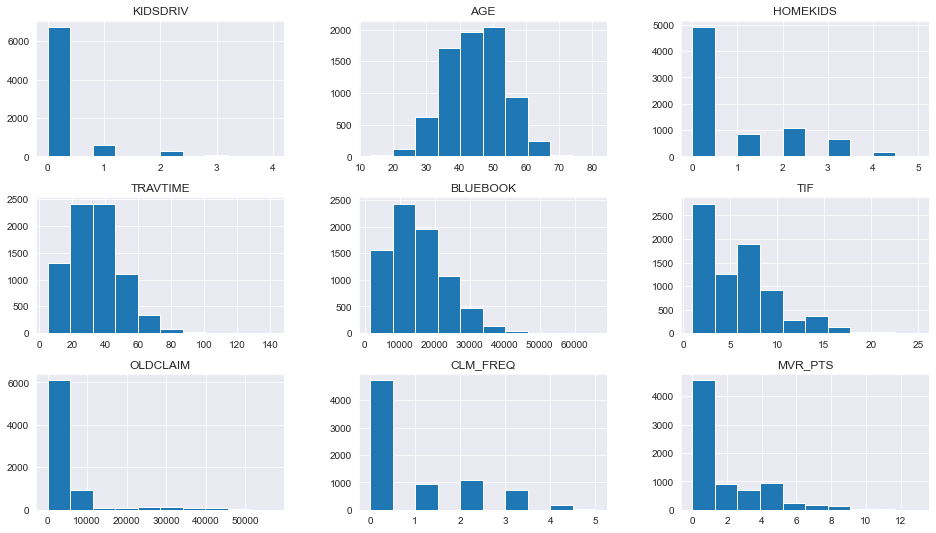

In [8]:
autoinsurance_df[int64_features].hist(figsize=(16,9))

array([[<AxesSubplot:title={'center':'YOJ'}>,
        <AxesSubplot:title={'center':'INCOME'}>],
       [<AxesSubplot:title={'center':'HOME_VAL'}>,
        <AxesSubplot:title={'center':'CAR_AGE'}>]], dtype=object)

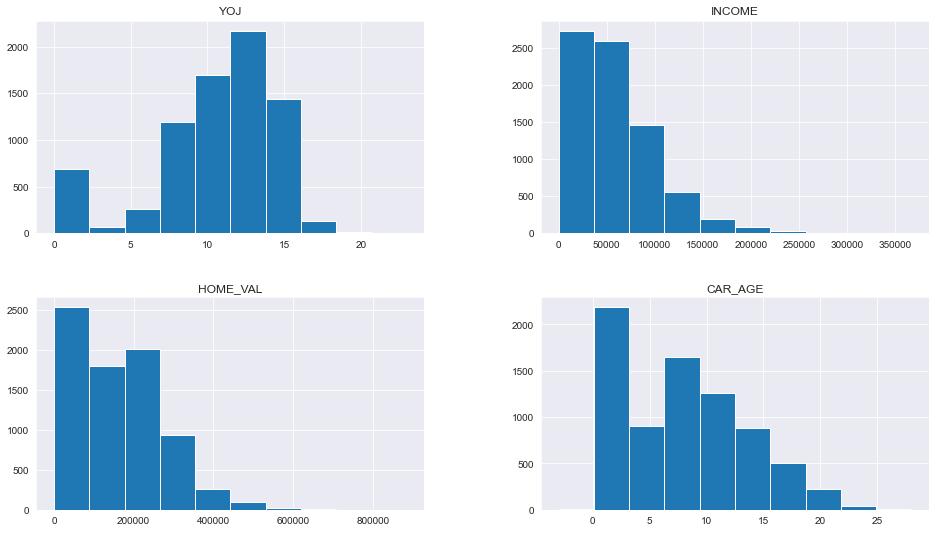

In [79]:
autoinsurance_df[float64_features].hist(figsize=(16,9))

#### 标签编码
将object型的feature转换成int32型的feature

In [10]:
encoder = LabelEncoder()
for i in range(len(object_features)):
    autoinsurance_df[object_features[i]+ '_code'] = encoder.fit_transform(autoinsurance_df[object_features[i]])

In [11]:
autoinsurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7661 entries, 0 to 10301
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   KIDSDRIV         7661 non-null   int64  
 1   AGE              7661 non-null   int64  
 2   HOMEKIDS         7661 non-null   int64  
 3   YOJ              7661 non-null   float64
 4   INCOME           7661 non-null   float64
 5   PARENT           7661 non-null   object 
 6   HOME_VAL         7661 non-null   float64
 7   MSTATUS          7661 non-null   object 
 8   GENDER           7661 non-null   object 
 9   EDUCATION        7661 non-null   object 
 10  OCCUPATION       7661 non-null   object 
 11  TRAVTIME         7661 non-null   int64  
 12  CAR_USE          7661 non-null   object 
 13  BLUEBOOK         7661 non-null   int64  
 14  TIF              7661 non-null   int64  
 15  CAR_TYPE         7661 non-null   object 
 16  RED_CAR          7661 non-null   object 
 17  OLDCLAIM     

array([[<AxesSubplot:title={'center':'PARENT_code'}>,
        <AxesSubplot:title={'center':'MSTATUS_code'}>,
        <AxesSubplot:title={'center':'GENDER_code'}>],
       [<AxesSubplot:title={'center':'EDUCATION_code'}>,
        <AxesSubplot:title={'center':'OCCUPATION_code'}>,
        <AxesSubplot:title={'center':'CAR_USE_code'}>],
       [<AxesSubplot:title={'center':'CAR_TYPE_code'}>,
        <AxesSubplot:title={'center':'RED_CAR_code'}>,
        <AxesSubplot:title={'center':'REVOKED_code'}>],
       [<AxesSubplot:title={'center':'URBANICITY_code'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

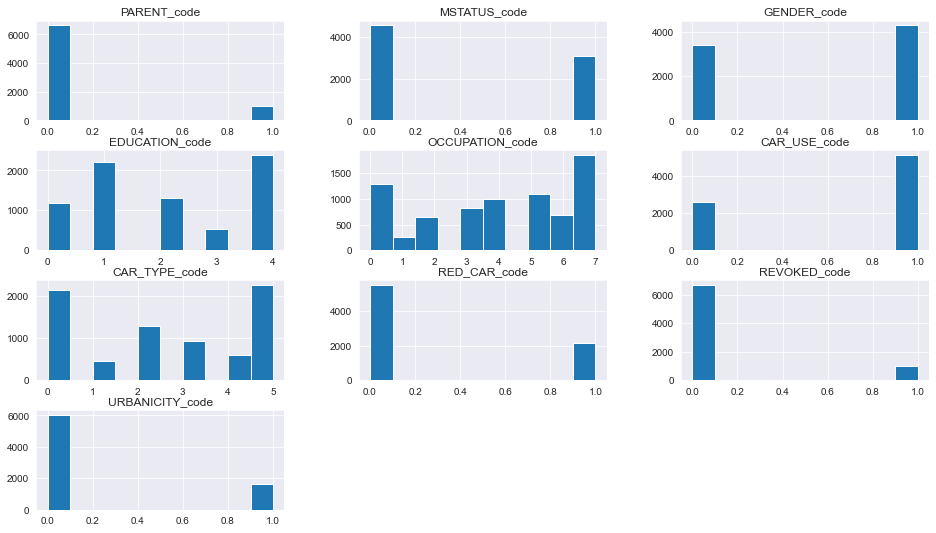

In [12]:
int32_features = autoinsurance_df.select_dtypes('int32').columns
autoinsurance_df[int32_features].hist(figsize=(16,9))

In [14]:
feature_list = list(int32_features) + list(int64_features) + list(float64_features)
feature_list

['PARENT_code',
 'MSTATUS_code',
 'GENDER_code',
 'EDUCATION_code',
 'OCCUPATION_code',
 'CAR_USE_code',
 'CAR_TYPE_code',
 'RED_CAR_code',
 'REVOKED_code',
 'URBANICITY_code',
 'KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'TRAVTIME',
 'BLUEBOOK',
 'TIF',
 'OLDCLAIM',
 'CLM_FREQ',
 'MVR_PTS',
 'YOJ',
 'INCOME',
 'HOME_VAL',
 'CAR_AGE']

### 特征相关性分析
从下图可以发现某些feature字段间的相关度也高。因此在后面决策树建模的数据特征选择时，可以考虑进行特征替换来减少模型的复杂度。

<AxesSubplot:>

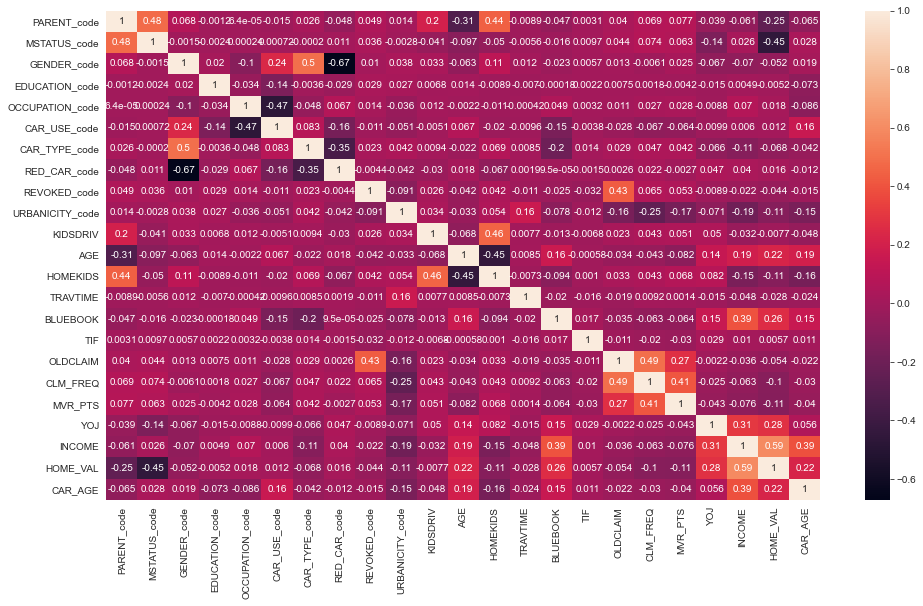

In [81]:
plt.subplots(figsize=(16,9))
correlation_mat = autoinsurance_df[feature_list].corr()
sns.heatmap(correlation_mat, annot=True)

### 初步分析
#### 一维分析
性别与车辆发生事故时赔付金额的关系

<AxesSubplot:xlabel='GENDER'>

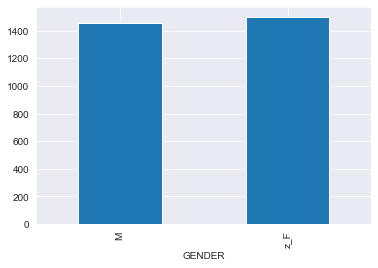

In [77]:
autoinsurance_df.groupby("GENDER")['CLM_AMT'].mean().plot(kind='bar')

年龄与车辆发生事故时赔付金额的关系

<AxesSubplot:xlabel='AGE'>

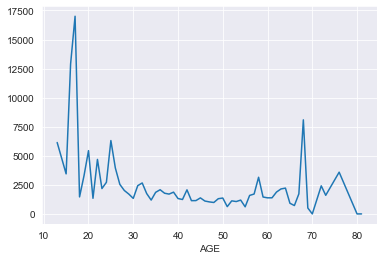

In [32]:
autoinsurance_df.groupby("AGE")['CLM_AMT'].mean().plot(figsize=(6,4))

#### 二维分析
不同性别不同年龄段与车辆发生事故时赔付金额的关系

<AxesSubplot:xlabel='AGE'>

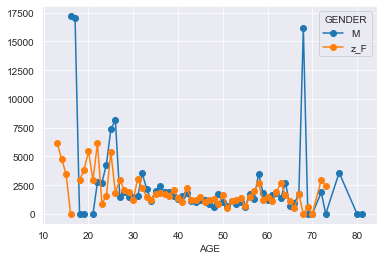

In [33]:
autoinsurance_df.pivot_table(index='AGE',columns="GENDER",values="CLM_AMT",aggfunc="mean").plot(style="-o",
                                                                                                figsize=(6,4))

#### 因变量分布

array([[<AxesSubplot:title={'center':'CLM_AMT'}>,
        <AxesSubplot:title={'center':'CLAIM_FLAG'}>]], dtype=object)

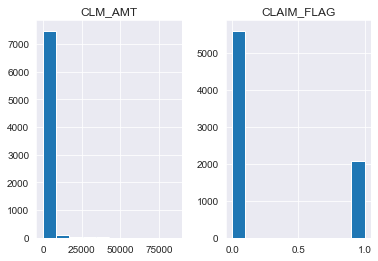

In [83]:
autoinsurance_df[["CLM_AMT","CLAIM_FLAG"]].hist(figsize=(6,4))

In [21]:
data_label_1 = autoinsurance_df[["CLAIM_FLAG"]]
data_label_2 = autoinsurance_df[["CLM_AMT"]]
data_features = autoinsurance_df[feature_list]

### 决策树回归——预测发生车辆事故时需要赔付的金额

In [62]:
train_data, test_data, train_label, test_label = train_test_split(data_features.values, 
                                                                data_label_2.values, test_size=0.2)

In [63]:
DT_model = DecisionTreeRegressor()
DT_model.fit(train_data,train_label.reshape([-1,]))

DecisionTreeRegressor()

In [64]:
print('Training set score :',mean_squared_error(DT_model.predict(train_data), train_label))
print('Testing set score :',mean_squared_error(DT_model.predict(test_data), test_label))

Training set score : 0.0
Testing set score : 40865399.78538813


由上述结果可以看出，在训练集中均分误差为0，而在测试集中均方误差很大，说明**过拟合**很严重。尝试使用GridSearchCV来进行超参选择，寻找合适超参进行建模。

In [35]:
param = {'max_depth': np.arange(3,10),'min_samples_leaf': np.arange(5,20),'min_samples_split':np.arange(2,20)}
clf = GridSearchCV(DecisionTreeRegressor(),param_grid=param,cv=8)
clf.fit(train_data ,train_label)
print(clf.best_params_, clf.best_score_)

{'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 2} 0.03342376012966024


In [65]:
DT_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=15, min_samples_split=2)
DT_model.fit(train_data,train_label.reshape([-1,]))

DecisionTreeRegressor(max_depth=3, min_samples_leaf=15)

In [66]:
print('Training set score :',mean_squared_error(DT_model.predict(train_data), train_label))
print('Testing set score :',mean_squared_error(DT_model.predict(test_data), test_label))

Training set score : 18787332.514881678
Testing set score : 18260333.23534574


#### 决策树回归预测结果可视化

In [68]:
test_predict = DT_model.predict(test_data)

In [69]:
test_label = test_label.reshape([-1,])
index_ = np.argsort(test_label)

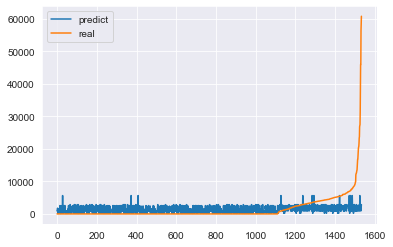

In [78]:
plt.figure(figsize=(6,4))
plt.plot(test_predict[index_] ,label='predict')
plt.plot(test_label[index_], label="real")
plt.legend()
plt.show()

#### 决策树回归可视化

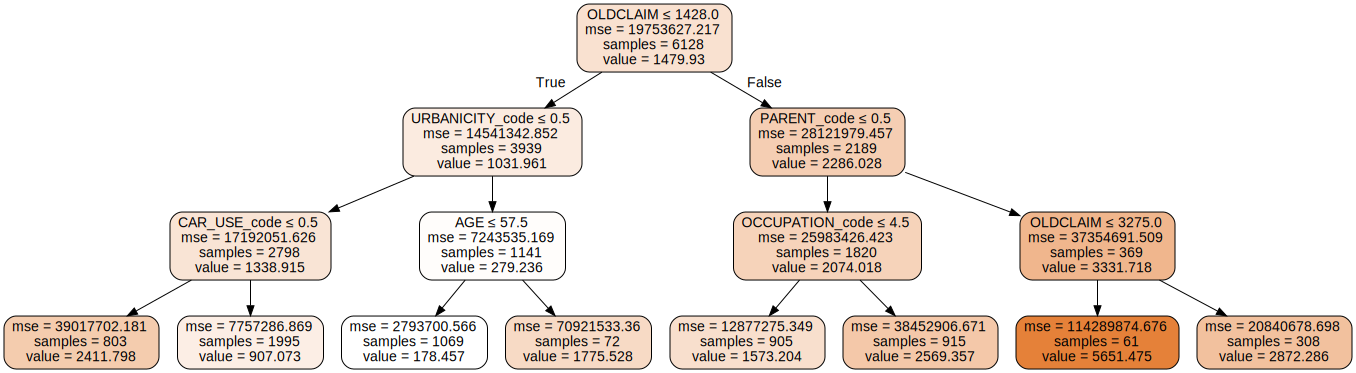

In [72]:
dot_data = tree.export_graphviz(DT_model, 
                                out_file=None, 
                                feature_names=feature_list, 
                                class_names='CLM_AMT',
                                filled=True, 
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 特征分析
通过查看决策树的特征权重，可以看出过去5年的总赔付额（OLDCLAIM）最能影响用户车辆在未来发生意外时需要赔付的金额；过去5年赔付越多，在未来发生意外时需要赔付的金额也越高。

In [73]:
feature_importance = {}
for i in range(len(feature_list)):
    feature_importance[feature_list[i]] = DT_model.feature_importances_[i]
feature_importance= sorted(feature_importance.items(), key=lambda d:d[1], reverse = True)
feature_importance

[('OLDCLAIM', 0.44011738714025),
 ('CAR_USE_code', 0.21892567406839442),
 ('URBANICITY_code', 0.15369796443731024),
 ('PARENT_code', 0.08195550981313982),
 ('OCCUPATION_code', 0.07624686420529492),
 ('AGE', 0.02905660033561066),
 ('MSTATUS_code', 0.0),
 ('GENDER_code', 0.0),
 ('EDUCATION_code', 0.0),
 ('CAR_TYPE_code', 0.0),
 ('RED_CAR_code', 0.0),
 ('REVOKED_code', 0.0),
 ('KIDSDRIV', 0.0),
 ('HOMEKIDS', 0.0),
 ('TRAVTIME', 0.0),
 ('BLUEBOOK', 0.0),
 ('TIF', 0.0),
 ('CLM_FREQ', 0.0),
 ('MVR_PTS', 0.0),
 ('YOJ', 0.0),
 ('INCOME', 0.0),
 ('HOME_VAL', 0.0),
 ('CAR_AGE', 0.0)]

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


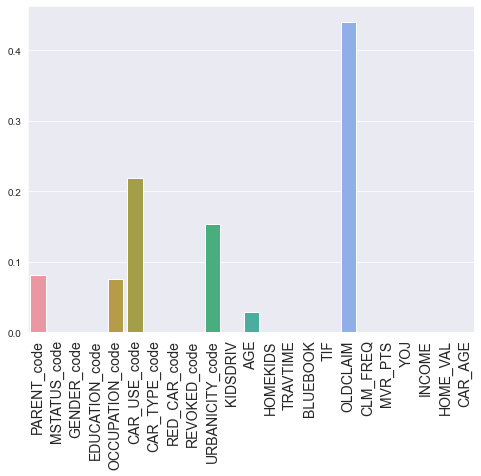

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(feature_list,list(DT_model.feature_importances_))
plt.xticks(rotation=90, fontsize=14)
plt.show()

### 决策树分类——预测是否发生事故

In [50]:
train_data, test_data, train_label, test_label = train_test_split(data_features.values, 
                                                                data_label_1.values, test_size=0.2)

In [51]:
DT_model = DecisionTreeClassifier()
DT_model.fit(train_data,train_label.reshape([-1,]))

DecisionTreeClassifier()

In [52]:
print('Training set score :', DT_model.score(train_data, train_label))
print('Testing set score :', DT_model.score(test_data, test_label))

Training set score : 1.0
Testing set score : 0.7077625570776256


由上述结果可以看出，模型在测试集与训练集的效果存在差距，说明存在**过拟合**现象。尝试使用**GridSearchCV**来进行超参选择，寻找合适超参进行建模。

In [53]:
param = {'max_depth': np.arange(3,10),'min_samples_leaf': np.arange(5,20),'min_samples_split':np.arange(2,20)}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param)
clf.fit(train_data ,train_label)
print(clf.best_params_, clf.best_score_)

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3} 0.7609317841329026


In [54]:
DT_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=3)
DT_model.fit(train_data,train_label.reshape([-1,]))

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=3)

In [55]:
print('Training set score :', DT_model.score(train_data, train_label))
print('Testing set score :', DT_model.score(test_data, test_label))

Training set score : 0.79161227154047
Testing set score : 0.7560339204174821


#### 决策树分类可视化

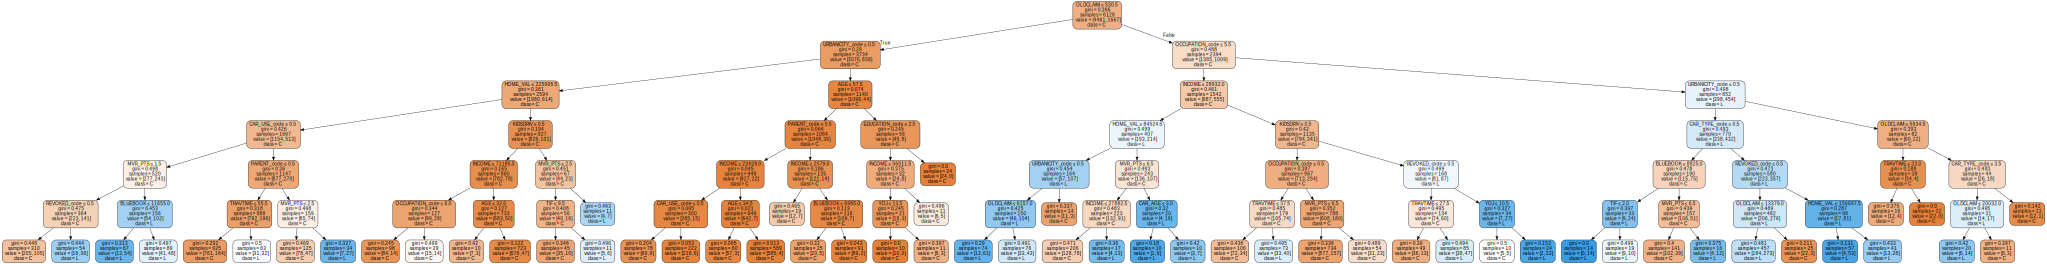

In [56]:
dot_data = tree.export_graphviz(DT_model, 
                                out_file=None, 
                                feature_names=feature_list, 
                                class_names='CLAIM_FLAG',
                                filled=True, 
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 特征分析
通过查看决策树的特征权重，可以看出过去5年的总赔付额（OLDCLAIM）最能体现用户车辆在未来是否会发生意外；过去5年赔付越多，在未来发生意外的风险也越高。

In [57]:
feature_importance = {}
for i in range(len(feature_list)):
    feature_importance[feature_list[i]] = DT_model.feature_importances_[i]
feature_importance= sorted(feature_importance.items(), key=lambda d:d[1], reverse = True)
feature_importance

[('OLDCLAIM', 0.3000875363063627),
 ('URBANICITY_code', 0.12258316230359248),
 ('HOME_VAL', 0.08927083430249116),
 ('OCCUPATION_code', 0.0728457423090706),
 ('INCOME', 0.0687179655157908),
 ('MVR_PTS', 0.06637476496797037),
 ('CAR_USE_code', 0.05979977386172367),
 ('REVOKED_code', 0.04084233732603595),
 ('KIDSDRIV', 0.040344903211390205),
 ('TRAVTIME', 0.035921497489085526),
 ('PARENT_code', 0.03198046848355203),
 ('CAR_TYPE_code', 0.02736477136887428),
 ('BLUEBOOK', 0.023549321471442244),
 ('TIF', 0.008296114309271956),
 ('YOJ', 0.004904247815209304),
 ('AGE', 0.003906548019222901),
 ('EDUCATION_code', 0.0026027115720921624),
 ('CAR_AGE', 0.0006072993668215),
 ('MSTATUS_code', 0.0),
 ('GENDER_code', 0.0),
 ('RED_CAR_code', 0.0),
 ('HOMEKIDS', 0.0),
 ('CLM_FREQ', 0.0)]

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


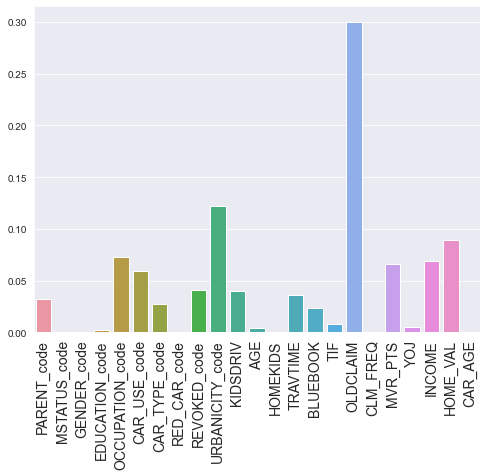

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(feature_list,list(DT_model.feature_importances_))
plt.xticks(rotation=90, fontsize=14)
plt.show()